In [21]:
# Victor Z, J E Umaña
# UW-Madison, 2024
# define ellipse using chi-square RV

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

In [23]:
# define ellipse function
# adapted from ellipse.m - Copyright (C) 2001, James B. Rawlings and John W. Eaton

def ellipse(amat, level, n=100, shift=None):
    if shift is None:
        shift = np.array([0, 0])

    shift = np.asarray(shift)

    if shift.shape != (2,):
        if shift.shape == (2, 1):
            shift = shift.flatten()
        else:
            raise ValueError('shift must be a 2-element row vector')

    # Use eigh instead of eig for symmetric matrices
    dl, v = np.linalg.eigh(amat / level)
    l = np.diag(dl)

    if np.any(np.imag(dl)) or np.any(dl <= 0):
        raise ValueError('ellipse: amat must be positive definite')

    # Generate contour data
    a = 1 / np.sqrt(dl[0])
    b = 1 / np.sqrt(dl[1])

    t = np.linspace(0, 2 * np.pi, n)
    xt = a * np.cos(t)
    yt = b * np.sin(t)

    # Rotate the contours
    ra = np.arctan2(v[1, 0], v[0, 0])

    cos_ra = np.cos(ra)
    sin_ra = np.sin(ra)

    x = xt * cos_ra - yt * sin_ra + shift[0]
    y = xt * sin_ra + yt * cos_ra + shift[1]

    # Endpoints of the major and minor axes
    minor = (v @ np.diag([a, b])).T
    major = minor.copy()

    major[1, :] = -major[0, :]
    minor[0, :] = -minor[1, :]

    t = np.array([shift, shift])
    major += t
    minor += t

    # Bounding box for the ellipse using magic formula
    ainv = np.linalg.inv(amat)
    xbox = np.sqrt(level * ainv[0, 0])
    ybox = np.sqrt(level * ainv[1, 1])

    bbox = np.array([
        [xbox, ybox],
        [xbox, -ybox],
        [-xbox, -ybox],
        [-xbox, ybox],
        [xbox, ybox]
    ])

    t = np.tile(shift, (5, 1))
    bbox += t

    return x, y, major, minor, bbox

(-2.5, 2.5, -2.5, 2.5)

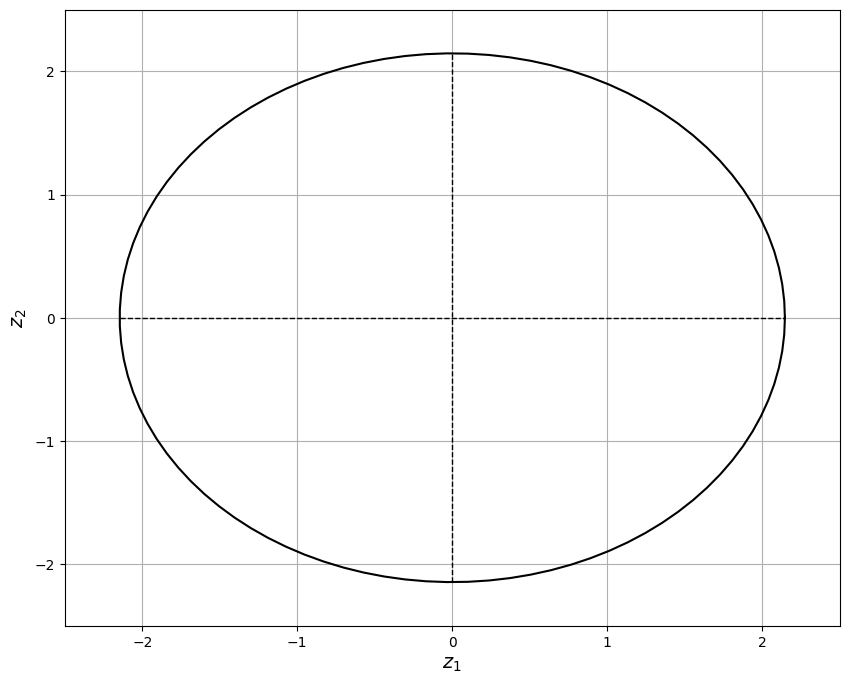

In [24]:
# Specify mean and covariance
mu = np.array([0, 0])
Sigma = np.array([[1, 0], [0, 1]])  # anticorrelated

# Compute the 90% confidence interval ellipse
alpha = 0.9  # confidence
n = 2 # dimension of variable
A = np.linalg.inv(Sigma)  # inverse covariance
b = chi2.ppf(alpha, 2)  # confidence level on 2d from chi2 distribution
xe, ye, major, minor, bbox = ellipse(A, b, 100, mu)  # ellipse

# Plot the ellipse
plt.figure(figsize=(10,8))
plt.plot(xe, ye, 'k', linewidth=1.5)  # plot ellipse
plt.xlabel('$z_1$', fontsize=14)
plt.ylabel('$z_2$', fontsize=14)
plt.grid(True)

# Plot 90% confidence regions
b = chi2.ppf(alpha, 2)
xx = np.linspace(-np.sqrt(b), np.sqrt(b))
yy1 = np.linspace(0, 0)
plt.plot(xx, yy1, 'k--', linewidth=1.0)
plt.plot(yy1, xx, 'k--', linewidth=1.0)
plt.axis([-2.5, 2.5, -2.5, 2.5])

(-2.5, 2.5, -2.5, 2.5)

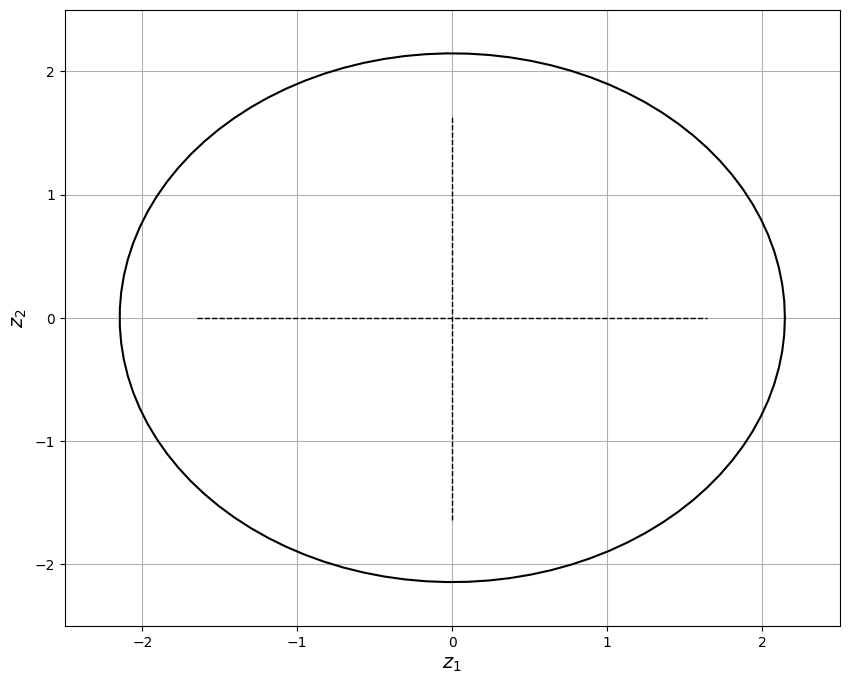

In [25]:
# Compare now with individual regions
plt.figure(figsize=(10,8))
plt.plot(xe, ye, 'k', linewidth=1.5)  # plot ellipse
plt.xlabel('$z_1$', fontsize=14)
plt.ylabel('$z_2$', fontsize=14)
plt.grid(True)

# Plot 90% confidence regions for N(0,1)
bb = chi2.ppf(alpha, 1)
xx = np.linspace(-np.sqrt(bb), np.sqrt(bb))
yy1 = np.linspace(0, 0)
plt.plot(xx, yy1, 'k--', linewidth=1.0)
plt.plot(yy1, xx, 'k--', linewidth=1.0)
plt.axis([-2.5, 2.5, -2.5, 2.5])


In [26]:
# Count the number of samples in the ellipse
np.random.seed(1)
nsample = 1000  # number of random samples
sample = np.random.multivariate_normal(mu, Sigma, nsample)  # collect samples
cnt = 0
for i in range(nsample):
    x = sample[i] - mu
    if np.dot(np.dot(x, np.linalg.inv(Sigma)), x.T) <= b:  # count if in the confidence interval
        cnt += 1
print(f'{cnt} among {nsample} samples in the ellipse')  # print the result

897 among 1000 samples in the ellipse
